In [5]:
import numpy as np
import scipy.stats as st
import seaborn as sns
from tqdm import trange

In [6]:
def circle(x, y):
    return (x-1)**2 + (y-2)**2 - 3**2

In [15]:
def metropolis(p, iter=1000):
    x, y = 0.0, 0.0
    samples = np.zeros((iter, 2))
    for i in trange(iter):
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star
        samples[i] = np.array([x, y])
    return samples

100%|██████████| 10000/10000 [00:00<00:00, 41218.06it/s]
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


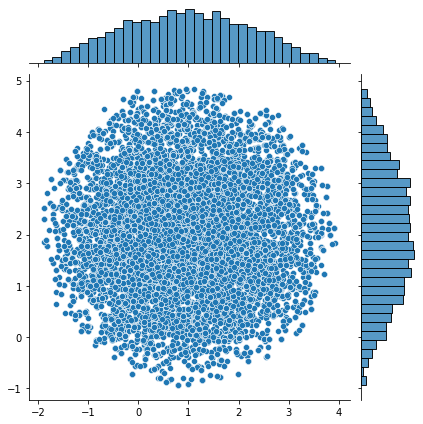

In [16]:
burn_in = 1000
samples = metropolis(circle, iter=10000)
sns.jointplot(samples[burn_in:, 0], samples[burn_in:, 1])